In [2]:
#preamble
%matplotlib inline
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
#from scipy import cluster, linalg, integrate, optimize, stats

In [10]:
g_state = qt.basis(2,0)
e_state = qt.basis(2,1)
sz = qt.sigmaz()
sm = qt.destroy(2)
sp = sm.dag()
I_atom = qt.qeye(2)
#define the operator of the atom(single Hilbert space)

In [11]:
Dimension_of_cavity = 15
a = qt.destroy(Dimension_of_cavity)
adag = a.dag()
vac = qt.basis(Dimension_of_cavity,0)
I_cav = qt.qeye(Dimension_of_cavity)
#define the operator of the cavity

In [12]:
g_vac = qt.tensor(vac,g_state)
sz = qt.tensor(I_cav,sz)
sm = qt.tensor(I_cav,sm)
sp = sm.dag()

a = qt.tensor(a,I_atom)
adag = qt.tensor(adag,I_atom)
#define the full operator by tensor product

In [13]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
H0 = wc * (adag * a) + wa * sp * sm
H1 = (adag + a) * (sm + sp)

step=100
g_range = np.linspace(0,3,step+1)*2*np.pi
#generate the list of interaction g

g_list=[]
e_list = []

for g in g_range:
    H = H0 + g * H1
    enr,states = H.eigenstates()
    g_list.append(states[0])
    e_list.append(states[1])
#Using the method [eigtenstates] to obtain eigen states and energy
na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity
g_na_exp_list = qt.expect(na,g_list)
g_nc_exp_list = qt.expect(nc,g_list)
e_na_exp_list = qt.expect(na,e_list)
e_nc_exp_list = qt.expect(nc,e_list)
#get the excitation number of cavity and photon

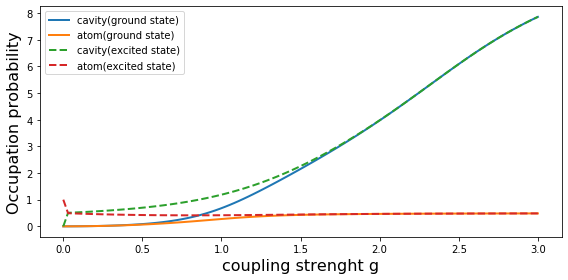

In [14]:
fig,axes = plt.subplots(figsize=(8,4))
axes.plot(g_range/(2*np.pi),g_nc_exp_list,linewidth = 2,label = "cavity(ground state)")
axes.plot(g_range/(2*np.pi),g_na_exp_list,linewidth = 2,label = "atom(ground state)")
axes.plot(g_range/(2*np.pi),e_nc_exp_list,'--',linewidth = 2,label = "cavity(excited state)")
axes.plot(g_range/(2*np.pi),e_na_exp_list,'--',linewidth = 2,label = "atom(excited state)")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght g", fontsize=16)
axes.legend()
fig.tight_layout()

In [3]:
a = qt.destroy(4)
a.type

'oper'